In [61]:
import numpy as np                              
from astropy import coordinates                 
import astropy.units as u                      
from astropy.coordinates import SkyCoord        
from astropy.coordinates import Galactocentric
from astroquery.gaia import Gaia            
from astroquery.simbad import Simbad  
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
coord   = SkyCoord.from_name('NGC104')
width   = u.Quantity(0.5, u.deg)
height  = u.Quantity(0.5, u.deg)
results = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


In [63]:
ra                    = results["ra"]                    # deg
ra_error              = results["ra_error"]              # mas
dec                   = results["dec"]                   # deg
dec_error             = results["dec_error"]             # mas
pmra                  = results["pmra"]                  # mas/yr
pmra_error            = results["pmra_error"]            # mas/yr
pmdec                 = results["pmdec"]                 # mas/yr
pmdec_error           = results["pmdec_error"]           # mas/yr

In [64]:
myfile = "gaia_results.dat" # define an output file name
np.savetxt(myfile, np.transpose([ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error]),
          header="ra  ra_error dec dec_error  pmra   pmra_error pmdec  pmdec_error  \n"+
                 "deg mas      deg            mas/yr mas/yr     mas/yr mas/yr      ")

In [70]:
np.loadtxt(myfile)

array([[  6.02136426,   0.07217161, -72.08178172, ...,   0.10512221,
         -2.4191661 ,   0.11534112],
       [  6.01931646,   0.1064567 , -72.07951356, ...,   0.28497987,
         -2.71452248,   0.18800403],
       [  6.02939667,   2.11005449, -72.08077542, ...,          nan,
                 nan,          nan],
       ...,
       [  6.26651436,   0.10079446, -71.83241061, ...,   0.21003722,
         -2.86495775,   0.17478624],
       [  6.26972601,   3.34140287, -71.83231279, ...,          nan,
                 nan,          nan],
       [  5.7764945 ,   0.22801908, -71.83165815, ...,   0.46737819,
         -2.40460376,   0.37052518]])

In [71]:
ra_deg,ra_error_mas,dec_deg,dec_error_mas,pmra_masyr,pmra_error_masyr,pmdec_masyr,pmdec_error_masyr = np.loadtxt(myfile,unpack=True)

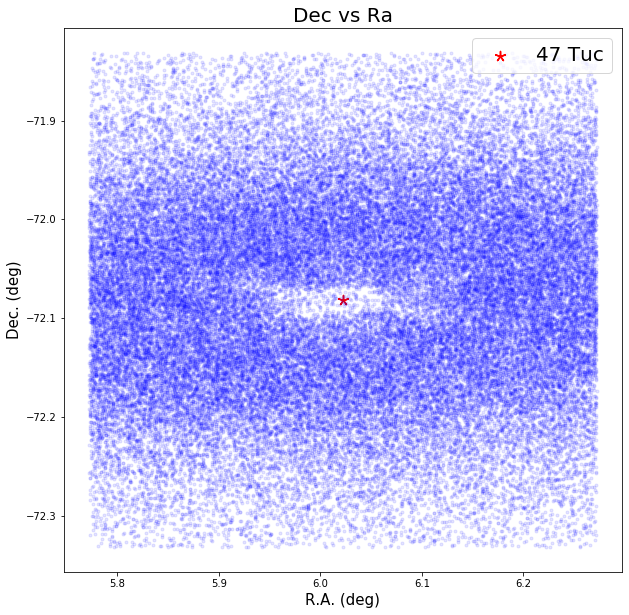

In [77]:
fig  = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(ra_deg,dec_deg,".",color='blue',alpha=0.1)
ax.scatter(coord.ra.deg, coord.dec.deg, marker=(5,2), s=100, color="red", label="47 Tuc")
plt.xlabel("R.A. (deg)",fontsize=15)
plt.ylabel("Dec. (deg)",fontsize=15)
plt.legend(loc="upper right",prop={'size':20})
plt.title("Dec vs Ra",fontsize=20)
plt.show()

### In the arguments, I have multiplied pmra_masyr and pmdec_masyr by (4.74) and (4.5) in order to get the proper motion in km/s.

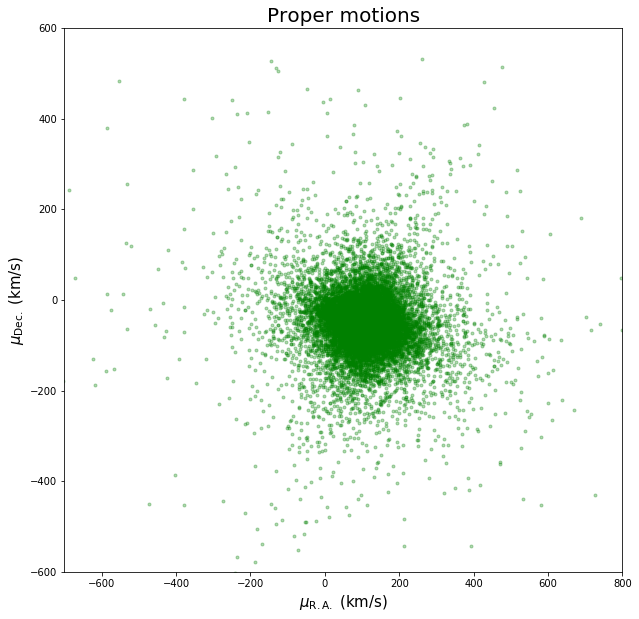

In [103]:
fig  = plt.figure(figsize=(10,10))

#plot in km/s
ax = fig.add_subplot(111)
ax.plot(pmra_masyr*4.5*4.74, pmdec_masyr*4.5*4.74, ".", color='green' ,alpha=0.3)
plt.xlim(-700,800)
plt.ylim(-600,600) 
plt.xlabel("$\mu_\mathrm{R.A.}$ (km/s)",fontsize=15)
plt.ylabel("$\mu_\mathrm{Dec.}$ (km/s)",fontsize=15)
plt.title("Proper motions",fontsize=20)
plt.show()

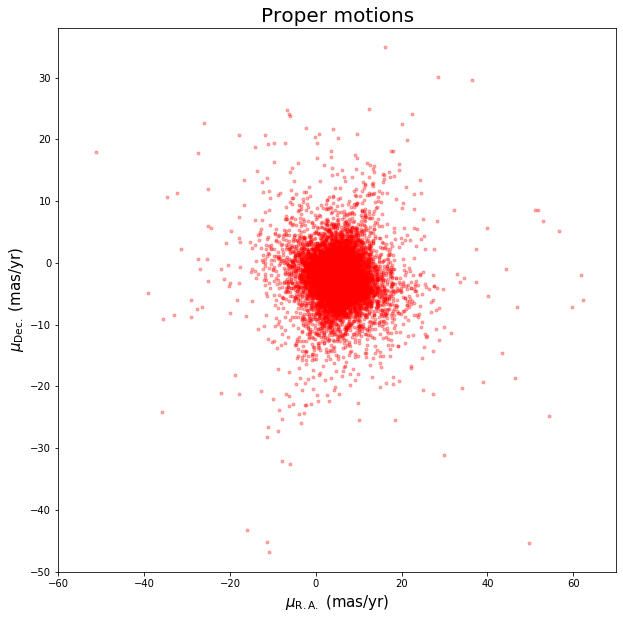

In [100]:
fig  = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.plot(pmra_masyr, pmdec_masyr, ".", color='red' ,alpha=0.3)
plt.xlim(-60, 70)
plt.ylim(-50, 38)
plt.xlabel("$\mu_\mathrm{R.A.}$ (mas/yr)",fontsize=15)
plt.ylabel("$\mu_\mathrm{Dec.}$ (mas/yr)",fontsize=15)
plt.title("Proper motions",fontsize=20)
plt.show()